# Statistical Forecasting
Vandeput, Nicolas. Data Science for Supply Chain Forecasting. De Gruyter. Kindle Edition. 

## Moving Average

### Moving Average Model
The moving average model is based on the idea that __future demand is similar to the recent demand we observed__. With this model, we simply assume that the forecast is the average demand during the last n periods. If you look at monthly demand, this could translate as: _“We predict the demand in June to be the average of March, April, and May.”_ If we formalize this idea, we obtain this formula: 
$$f_t = \frac{1}{n} \sum_{i=1}^{n} d_{t-i}$$

Where,  
 - $f_t$ is the forecast for period t
 - $n$ is the number of periods we take the average of
 - $d_t$ is the demand during period t




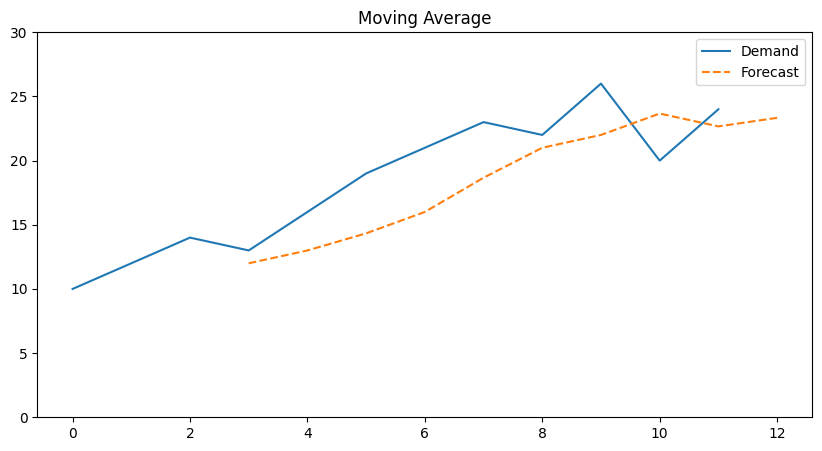

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def moving_average(demand, extra_periods=1, n=3):
    # Historical period length
    cols = len(demand)
    # Append np.nan into the demand array to cover future periods
    demand = np.append(demand, [np.nan]*extra_periods)
    # Create a forecast column full of np.nan
    forecast = np.full(cols+extra_periods, np.nan)
    # Calculate the forecast
    for t in range(n, demand.shape[0]):
        forecast[t] = np.mean(demand[t-n:t])
    df = pd.DataFrame.from_dict({"Demand": demand, "Forecast": forecast})
    return df

### Example
demand = np.array([10, 12, 14, 13, 16, 19, 21, 23, 22, 26, 20, 24])
df = moving_average(demand, extra_periods=4, n=3)
df[['Demand', 'Forecast']].plot(figsize = (10, 5), title = 'Moving Average', ylim = (0,30), style = ['-', '--'])
plt.show()

### Moving Average Limitations
There are three main limitations at the core of a moving average. 
1. __No Trend__ The model does not see any trend (and therefore won’t project any). 
2. __No Seasonality__ The model does not see any seasonality (and therefore won’t project any).
3. __Flat Historical Weighting__ The model gives the same weight to all historical periods. This means that the model will give the same importance to a period that is very far in the past as to a period that is very recent.
